In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/distance-second/distance_second.csv
/kaggle/input/dist-matrix-bus-station/dist_matrix_bus_station.csv
/kaggle/input/cmu-cleaned/cmu_cleaned.csv
/kaggle/input/raw-data-bus/Export_2019_202301.csv


# Import Dataset

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [4]:
walking_time = pd.read_csv('/kaggle/input/distance-second/distance_second.csv')
distance_Bus_metre = pd.read_csv('/kaggle/input/dist-matrix-bus-station/dist_matrix_bus_station.csv')

In [5]:
distance_Bus_metre

,CMU Food Center,HAS CENTER,ITSC,Skywalk ข้างอาคารเรียนรวม,คณะการสื่อสารมวลชน,คณะนิติศาสตร์,คณะบริหารธุรกิจ,คณะรัฐศาสตร์ฯ,คณะวิศวกรรมศาสตร์,คณะสถาปัตยกรรมศาสตร์,...,อาคาร 30ปี คณะวิศวกรรมศาสตร์,อาคาร HB7 คณะมนุษยศาสตร์,อาคารจอดรถS1,อาคารปฏิบัติการกลางคณะวิทยาศาสตร์,อาคารเรียนรวมโรงเรียนสาธิต มช.,อุทยานวิทยาศาสตร์,อ่างแก้ว,โรงจอดรถไฟฟ้า,โรงพยาบาลประสาท,โรงอาหารคณะรัฐศาสตร์
0,0.000,995.721,950.858,2730.773,241.629,763.544,1281.729,779.451,498.555,459.552,...,568.027,661.096,1395.920,2463.938,557.495,5898.504,963.597,1285.086,2643.918,779.451
1,990.685,0.000,386.879,3546.094,749.056,276.503,2097.050,575.708,1408.408,1450.237,...,1383.348,440.931,2211.241,2439.095,1372.816,6713.825,32.124,2100.407,3459.239,575.708
2,968.280,386.879,0.000,3159.215,1135.935,663.382,1710.171,188.829,1021.529,1427.832,...,996.469,827.810,1824.362,2391.848,985.937,6326.946,419.003,1713.528,3072.360,188.829
3,2742.476,3576.545,3189.666,0.000,2984.105,3418.328,1657.983,3018.259,2243.921,2807.166,...,2218.861,3184.384,1543.792,2349.764,2208.329,6058.065,3608.669,1446.042,295.317,3018.259
4,241.629,754.092,1140.971,2972.402,0.000,521.915,1523.358,1021.080,740.184,701.181,...,809.656,726.627,1637.549,2705.567,799.124,6140.133,721.968,1526.715,2885.547,1021.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,5873.036,6707.105,6320.226,5982.305,6114.665,6548.888,4653.101,6148.819,5374.481,5585.442,...,5349.421,6314.944,4743.429,6309.448,5433.421,0.000,6739.229,5405.726,5686.988,6148.819
60,958.561,32.124,419.003,3578.218,716.932,244.379,2129.174,607.832,1440.532,1418.113,...,1415.472,408.807,2243.365,2460.887,1404.940,6745.949,0.000,2132.531,3491.363,607.832
61,1296.434,2130.503,1743.624,1445.687,1538.063,1972.286,861.339,1572.217,797.879,1361.124,...,772.819,1738.342,747.148,1178.852,762.287,5490.577,2162.627,0.000,1600.062,1572.217
62,2618.927,3452.996,3066.117,295.317,2860.556,3294.779,1362.666,2894.710,2120.372,2642.272,...,2095.312,3060.835,1248.475,2505.090,2179.312,5762.748,3485.120,1601.368,0.000,2894.710


In [6]:
Bus_time = (distance_Bus_metre/1000)/(20/3600) 
Bus_time

,CMU Food Center,HAS CENTER,ITSC,Skywalk ข้างอาคารเรียนรวม,คณะการสื่อสารมวลชน,คณะนิติศาสตร์,คณะบริหารธุรกิจ,คณะรัฐศาสตร์ฯ,คณะวิศวกรรมศาสตร์,คณะสถาปัตยกรรมศาสตร์,...,อาคาร 30ปี คณะวิศวกรรมศาสตร์,อาคาร HB7 คณะมนุษยศาสตร์,อาคารจอดรถS1,อาคารปฏิบัติการกลางคณะวิทยาศาสตร์,อาคารเรียนรวมโรงเรียนสาธิต มช.,อุทยานวิทยาศาสตร์,อ่างแก้ว,โรงจอดรถไฟฟ้า,โรงพยาบาลประสาท,โรงอาหารคณะรัฐศาสตร์
0,0.00000,179.22978,171.15444,491.53914,43.49322,137.43792,230.71122,140.30118,89.73990,82.71936,...,102.24486,118.99728,251.26560,443.50884,100.34910,1061.73072,173.44746,231.31548,475.90524,140.30118
1,178.32330,0.00000,69.63822,638.29692,134.83008,49.77054,377.46900,103.62744,253.51344,261.04266,...,249.00264,79.36758,398.02338,439.03710,247.10688,1208.48850,5.78232,378.07326,622.66302,103.62744
2,174.29040,69.63822,0.00000,568.65870,204.46830,119.40876,307.83078,33.98922,183.87522,257.00976,...,179.36442,149.00580,328.38516,430.53264,177.46866,1138.85028,75.42054,308.43504,553.02480,33.98922
3,493.64568,643.77810,574.13988,0.00000,537.13890,615.29904,298.43694,543.28662,403.90578,505.28988,...,399.39498,573.18912,277.88256,422.95752,397.49922,1090.45170,649.56042,260.28756,53.15706,543.28662
4,43.49322,135.73656,205.37478,535.03236,0.00000,93.94470,274.20444,183.79440,133.23312,126.21258,...,145.73808,130.79286,294.75882,487.00206,143.84232,1105.22394,129.95424,274.80870,519.39846,183.79440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1057.14648,1207.27890,1137.64068,1076.81490,1100.63970,1178.79984,837.55818,1106.78742,967.40658,1005.37956,...,962.89578,1136.68992,853.81722,1135.70064,978.01578,0.00000,1213.06122,973.03068,1023.65784,1106.78742
60,172.54098,5.78232,75.42054,644.07924,129.04776,43.98822,383.25132,109.40976,259.29576,255.26034,...,254.78496,73.58526,403.80570,442.95966,252.88920,1214.27082,0.00000,383.85558,628.44534,109.40976
61,233.35812,383.49054,313.85232,260.22366,276.85134,355.01148,155.04102,282.99906,143.61822,245.00232,...,139.10742,312.90156,134.48664,212.19336,137.21166,988.30386,389.27286,0.00000,288.01116,282.99906
62,471.40686,621.53928,551.90106,53.15706,514.90008,593.06022,245.27988,521.04780,381.66696,475.60896,...,377.15616,550.95030,224.72550,450.91620,392.27616,1037.29464,627.32160,288.24624,0.00000,521.04780


In [7]:
walking_times = walking_time.drop(columns = 'name')
walking_times

,หอพักชาย6,หอพักชาย5,หอ 1 หญิง,7th Male Dormitory,Students' Dormitory Boys,หอ 2 หญิง,หอพักชาย 4,หอ 8 หญิง,หอ 7 หญิง,หอ 5 หญิง,...,หอหญิง 8,อ.มช.,อาคาร 30ปี คณะวิศวกรรมศาสตร์,อาคาร HB7 คณะมนุษยศาสตร์,อาคารจอดรถS1,อาคารปฏิบัติการกลางคณะวิทยาศาสตร์,อาคารเรียนรวมโรงเรียนสาธิต มช.,อ่างแก้ว,โรงจอดรถไฟฟ้า,โรงอาหารคณะรัฐศาสตร์
0,0.000000,66.248032,288.866265,190.561441,1355.728150,226.468882,72.113220,283.931101,223.192833,221.629763,...,258.897299,216.409779,182.168893,431.743328,656.939846,469.697087,274.629653,586.542781,616.079155,472.739611
1,66.248032,0.000000,313.053886,235.988535,1339.725956,277.889747,72.591909,295.384858,252.591237,230.204992,...,272.361737,276.831123,122.780272,495.325835,615.012304,515.526703,231.778458,650.313313,614.712634,529.746020
2,288.866265,313.053886,0.000000,433.362870,1117.281532,148.250236,240.464663,60.007017,67.510442,98.684889,...,59.510590,212.163291,325.523196,528.152044,554.989352,243.220934,287.170520,659.054995,357.558795,322.307768
3,190.561441,235.988535,433.362870,0.000000,1535.074513,314.889345,261.950609,447.238868,366.725209,392.780286,...,421.626116,265.499706,357.974313,299.563691,846.910937,544.221199,463.680805,449.271786,784.006031,497.852065
4,1355.728150,1339.725956,1117.281532,1535.074513,0.000000,1262.449169,1285.152812,1090.718558,1178.033349,1142.320209,...,1115.893077,1326.786894,1255.754137,1630.723154,819.313775,1162.442590,1127.644002,1738.611395,760.390538,1296.478430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,469.697087,515.526703,243.220934,544.221199,1162.442590,244.868443,447.457113,299.363995,275.690324,338.865712,...,302.708987,279.802914,558.099179,495.792916,755.772430,0.000000,530.382412,580.934473,438.482726,134.976788
170,274.629653,231.778458,287.170520,463.680805,1127.644002,361.105496,207.737163,232.801427,270.064512,195.363927,...,227.727459,399.270332,128.381910,688.250185,383.616618,530.382412,0.000000,839.583805,449.106958,598.462399
171,586.542781,650.313313,659.054995,449.271786,1738.611395,515.000783,638.287450,707.403973,618.896849,686.777064,...,688.439562,456.883174,768.253528,155.013660,1195.798794,580.934473,839.583805,0.000000,990.289645,452.836124
172,616.079155,614.712634,357.558795,784.006031,760.390538,502.061156,550.208585,336.849424,420.247278,395.009737,...,362.503423,566.409208,562.263204,873.622789,408.644630,438.482726,449.106958,990.289645,0.000000,571.349473


# Creat a Graph from distance matrix

# GET A BUS LINE

# Create a Graph from each route

In [10]:
walking_times_i =  walking_times
walking_times_i = walking_times_i .set_index(walking_times_i.columns, drop=True)
walking_times_i

,หอพักชาย6,หอพักชาย5,หอ 1 หญิง,7th Male Dormitory,Students' Dormitory Boys,หอ 2 หญิง,หอพักชาย 4,หอ 8 หญิง,หอ 7 หญิง,หอ 5 หญิง,...,หอหญิง 8,อ.มช.,อาคาร 30ปี คณะวิศวกรรมศาสตร์,อาคาร HB7 คณะมนุษยศาสตร์,อาคารจอดรถS1,อาคารปฏิบัติการกลางคณะวิทยาศาสตร์,อาคารเรียนรวมโรงเรียนสาธิต มช.,อ่างแก้ว,โรงจอดรถไฟฟ้า,โรงอาหารคณะรัฐศาสตร์
หอพักชาย6,0.000000,66.248032,288.866265,190.561441,1355.728150,226.468882,72.113220,283.931101,223.192833,221.629763,...,258.897299,216.409779,182.168893,431.743328,656.939846,469.697087,274.629653,586.542781,616.079155,472.739611
หอพักชาย5,66.248032,0.000000,313.053886,235.988535,1339.725956,277.889747,72.591909,295.384858,252.591237,230.204992,...,272.361737,276.831123,122.780272,495.325835,615.012304,515.526703,231.778458,650.313313,614.712634,529.746020
หอ 1 หญิง,288.866265,313.053886,0.000000,433.362870,1117.281532,148.250236,240.464663,60.007017,67.510442,98.684889,...,59.510590,212.163291,325.523196,528.152044,554.989352,243.220934,287.170520,659.054995,357.558795,322.307768
7th Male Dormitory,190.561441,235.988535,433.362870,0.000000,1535.074513,314.889345,261.950609,447.238868,366.725209,392.780286,...,421.626116,265.499706,357.974313,299.563691,846.910937,544.221199,463.680805,449.271786,784.006031,497.852065
Students' Dormitory Boys,1355.728150,1339.725956,1117.281532,1535.074513,0.000000,1262.449169,1285.152812,1090.718558,1178.033349,1142.320209,...,1115.893077,1326.786894,1255.754137,1630.723154,819.313775,1162.442590,1127.644002,1738.611395,760.390538,1296.478430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
อาคารปฏิบัติการกลางคณะวิทยาศาสตร์,469.697087,515.526703,243.220934,544.221199,1162.442590,244.868443,447.457113,299.363995,275.690324,338.865712,...,302.708987,279.802914,558.099179,495.792916,755.772430,0.000000,530.382412,580.934473,438.482726,134.976788
อาคารเรียนรวมโรงเรียนสาธิต มช.,274.629653,231.778458,287.170520,463.680805,1127.644002,361.105496,207.737163,232.801427,270.064512,195.363927,...,227.727459,399.270332,128.381910,688.250185,383.616618,530.382412,0.000000,839.583805,449.106958,598.462399
อ่างแก้ว,586.542781,650.313313,659.054995,449.271786,1738.611395,515.000783,638.287450,707.403973,618.896849,686.777064,...,688.439562,456.883174,768.253528,155.013660,1195.798794,580.934473,839.583805,0.000000,990.289645,452.836124
โรงจอดรถไฟฟ้า,616.079155,614.712634,357.558795,784.006031,760.390538,502.061156,550.208585,336.849424,420.247278,395.009737,...,362.503423,566.409208,562.263204,873.622789,408.644630,438.482726,449.106958,990.289645,0.000000,571.349473


In [11]:
Bus_time_i = Bus_time
Bus_time_i = Bus_time_i .set_index(Bus_time_i.columns, drop=True)


In [ ]:
#ตัวอย่าง
subset = time_matrix.loc[[0, 2], ['หอพักชาย6', 'หอพักชาย5']]
print(subset)

In [12]:
route1 = Bus_time_i .loc[['ลานจอดรถหน้ามช.','สำนักงานมหาวิทยาลัย','หอพักหญิง 3','ลานกิจกรรมหอพักหญิง 2','ตรงข้ามศูนย์อาหาร','ลานหน้าอาคาร 1 คณะศึกษาศาสตร์','อาคารจอดรถS1','สาขาวิศวกรรมไฟฟ้า','CMU Food Center','หอพักหญิง 3','อ.มช.','ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์'], ['ลานจอดรถหน้ามช.','สำนักงานมหาวิทยาลัย','หอพักหญิง 3','ลานกิจกรรมหอพักหญิง 2','ตรงข้ามศูนย์อาหาร','ลานหน้าอาคาร 1 คณะศึกษาศาสตร์','อาคารจอดรถS1','สาขาวิศวกรรมไฟฟ้า','CMU Food Center','หอพักหญิง 3','อ.มช.','ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์']]
route1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, ลานจอดรถหน้ามช. to ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ลานจอดรถหน้ามช.                 12 non-null     float64
 1   สำนักงานมหาวิทยาลัย             12 non-null     float64
 2   หอพักหญิง 3                     12 non-null     float64
 3   ลานกิจกรรมหอพักหญิง 2           12 non-null     float64
 4   ตรงข้ามศูนย์อาหาร               12 non-null     float64
 5   ลานหน้าอาคาร 1 คณะศึกษาศาสตร์   12 non-null     float64
 6   อาคารจอดรถS1                    12 non-null     float64
 7   สาขาวิศวกรรมไฟฟ้า               12 non-null     float64
 8   CMU Food Center                 12 non-null     float64
 9   หอพักหญิง 3                     12 non-null     float64
 10  อ.มช.                           12 non-null     float64
 11  ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์  12 non-null     float64
dtypes

In [13]:
route1

,ลานจอดรถหน้ามช.,สำนักงานมหาวิทยาลัย,หอพักหญิง 3,ลานกิจกรรมหอพักหญิง 2,ตรงข้ามศูนย์อาหาร,ลานหน้าอาคาร 1 คณะศึกษาศาสตร์,อาคารจอดรถS1,สาขาวิศวกรรมไฟฟ้า,CMU Food Center,หอพักหญิง 3,อ.มช.,ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์
ลานจอดรถหน้ามช.,0.0,77.28624,214.27272,214.27272,239.87592,374.30208,428.95674,405.35802,274.86198,214.27272,214.27272,103.70826
สำนักงานมหาวิทยาลัย,inf,0.00000,136.98648,136.98648,162.58968,297.01584,351.67050,328.07178,197.57574,136.98648,136.98648,26.42202
หอพักหญิง 3,inf,140.12388,0.00000,0.00000,25.60320,160.02936,214.68402,191.08530,60.58926,0.00000,0.00000,113.70186
ลานกิจกรรมหอพักหญิง 2,inf,140.12388,0.00000,0.00000,25.60320,160.02936,214.68402,191.08530,60.58926,0.00000,0.00000,113.70186
ตรงข้ามศูนย์อาหาร,inf,165.72708,25.60320,25.60320,0.00000,185.63256,240.28722,216.68850,34.98606,25.60320,25.60320,139.30506
ลานหน้าอาคาร 1 คณะศึกษาศาสตร์,inf,302.07960,161.95572,161.95572,187.55892,0.00000,54.65466,99.74718,192.02670,161.95572,161.95572,275.65758
อาคารจอดรถS1,inf,356.73426,216.61038,216.61038,242.21358,54.65466,0.00000,154.40184,246.68136,216.61038,216.61038,330.31224
สาขาวิศวกรรมไฟฟ้า,inf,328.78890,188.66502,188.66502,214.26822,99.74718,154.40184,0.00000,190.61874,188.66502,188.66502,302.36688
CMU Food Center,inf,200.71314,60.58926,60.58926,34.98606,196.61094,251.26560,190.61874,0.00000,60.58926,60.58926,174.29112
หอพักหญิง 3,inf,140.12388,0.00000,0.00000,25.60320,160.02936,214.68402,191.08530,60.58926,0.00000,0.00000,113.70186


In [14]:
route2 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตรงข้ามสำนักหอสมุด','คณะสังคมศาสตร์','คณะนิติศาสตร์','อ่างแก้ว','HAS CENTER','ตรงข้าม ITSC','คณะรัฐศาสตร์ฯ','คณะรัฐศาสตร์ฯ','อาคารปฏิบัติการกลางคณะวิทยาศาสตร์','ลานกิจกรรมหอพักหญิง 2'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตรงข้ามสำนักหอสมุด','คณะสังคมศาสตร์','คณะนิติศาสตร์','อ่างแก้ว','HAS CENTER','ตรงข้าม ITSC','คณะรัฐศาสตร์ฯ','คณะรัฐศาสตร์ฯ','อาคารปฏิบัติการกลางคณะวิทยาศาสตร์','ลานกิจกรรมหอพักหญิง 2']]
route3 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','อาคารปฏิบัติการกลางคณะวิทยาศาสตร์','โรงอาหารคณะรัฐศาสตร์','ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์','ลานจอดรถหน้ามช.','ลานจอดรถ อ่างแก้ว','อาคาร HB7 คณะมนุษยศาสตร์','ตรงข้ามสำนักหอสมุด'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','อาคารปฏิบัติการกลางคณะวิทยาศาสตร์','โรงอาหารคณะรัฐศาสตร์','ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์','ลานจอดรถหน้ามช.','ลานจอดรถ อ่างแก้ว','อาคาร HB7 คณะมนุษยศาสตร์','ตรงข้ามสำนักหอสมุด']]
route4 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','สนามเทนนิส','หอพักนักศึกษา 40 ปี','โรงจอดรถไฟฟ้า','ลานจอดรถหอพัก 40 ปี','ตรงข้ามสนามเทนนิส','หอหญิง 1','หอหญิง 8','หอหญิง 5','หอหญิง 4','หอพักนักศึกษาหญิง 6','ระหว่างหอพักนักศึกษาชาย อาคาร 4 และ 3'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','สนามเทนนิส','หอพักนักศึกษา 40 ปี','โรงจอดรถไฟฟ้า','ลานจอดรถหอพัก 40 ปี','ตรงข้ามสนามเทนนิส','หอหญิง 1','หอหญิง 8','หอหญิง 5','หอหญิง 4','หอพักนักศึกษาหญิง 6','ระหว่างหอพักนักศึกษาชาย อาคาร 4 และ 3']]
route5 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','หอหญิง 4','หอพักนักศึกษาหญิง 6','อาคารเรียนรวมโรงเรียนสาธิต มช.','ลานหน้าอาคาร 1 คณะศึกษาศาสตร์','คณะบริหารธุรกิจ','อาคารจอดรถS1','บัณฑิตวิทยาลัย','อาคาร 30ปี คณะวิศวกรรมศาสตร์','ประตูวิศวกรรมศาสตร์ใหม่','ภาควิชาวิศวกรรมสิ่งแวดล้อม','คณะสถาปัตยกรรมศาสตร์','CMU Food Center'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','หอหญิง 4','หอพักนักศึกษาหญิง 6','อาคารเรียนรวมโรงเรียนสาธิต มช.','ลานหน้าอาคาร 1 คณะศึกษาศาสตร์','คณะบริหารธุรกิจ','อาคารจอดรถS1','บัณฑิตวิทยาลัย','อาคาร 30ปี คณะวิศวกรรมศาสตร์','ประตูวิศวกรรมศาสตร์ใหม่','ภาควิชาวิศวกรรมสิ่งแวดล้อม','คณะสถาปัตยกรรมศาสตร์','CMU Food Center']]
route6 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตลาดร่มสัก','คณะการสื่อสารมวลชน','คณะนิติศาสตร์','CMU Food Center'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตลาดร่มสัก','คณะการสื่อสารมวลชน','คณะนิติศาสตร์','CMU Food Center']]
route7 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตรงข้ามสำนักหอสมุด','คณะสังคมศาสตร์','อาคาร HB7 คณะมนุษยศาสตร์','ตรงข้าม ITSC','คณะรัฐศาสตร์ฯ','อ.มช.'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตรงข้ามสำนักหอสมุด','คณะสังคมศาสตร์','อาคาร HB7 คณะมนุษยศาสตร์','ตรงข้าม ITSC','คณะรัฐศาสตร์ฯ','อ.มช.']]
route8 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','อ.มช.','ภาควิชาสถิติ','ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์','ลานจอดรถหน้ามช.','สำนักงานมหาวิทยาลัย','ITSC','สำนักหอสมุด'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','อ.มช.','ภาควิชาสถิติ','ทางขึ้นศาลาธรรมตรงข้ามไปรษณีย์','ลานจอดรถหน้ามช.','สำนักงานมหาวิทยาลัย','ITSC','สำนักหอสมุด']]
route9 = Bus_time_i .loc[['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตรงข้ามศูนย์อาหาร','คณะวิศวกรรมศาสตร์','ลานหน้าอาคาร 1 คณะศึกษาศาสตร์','คณะบริหารธุรกิจ','โรงจอดรถไฟฟ้า','ลานจอดรถหอพัก 40 ปี','ตรงข้ามหอพักนักศึกษาสีชมพู','ตรงข้ามสนามเทนนิส','ลานกิจกรรมหอพักหญิง 2'],['สถานีกลางรถไฟฟ้า (หอหญิง3)','ตรงข้ามศูนย์อาหาร','คณะวิศวกรรมศาสตร์','ลานหน้าอาคาร 1 คณะศึกษาศาสตร์','คณะบริหารธุรกิจ','โรงจอดรถไฟฟ้า','ลานจอดรถหอพัก 40 ปี','ตรงข้ามหอพักนักศึกษาสีชมพู','ตรงข้ามสนามเทนนิส','ลานกิจกรรมหอพักหญิง 2']]

In [15]:
route0 = walking_times_i

In [16]:
locate = pd.read_csv('/kaggle/input/cmu-cleaned/cmu_cleaned.csv')

# Generate a 9 routes of Bus

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages

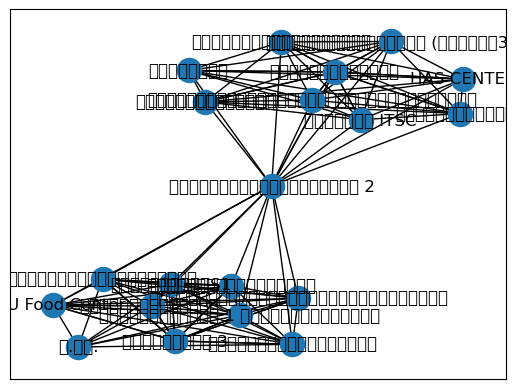

In [17]:
import pandas as pd
import networkx as nx

# Create a multigraph object
G = nx.MultiGraph()

# Read multiple dataframes
dfs = []
dfs.append(route1)
dfs.append(route2)
#dfs.append(route3)

# Iterate over each dataframe
for df in dfs:
    # Extract the node labels from the dataframe
    nodes = list(df.columns.values)

    # Add nodes to the graph
    G.add_nodes_from(nodes)

    # Iterate over each pair of nodes and add edges to the graph
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            if df.iloc[i,j] > 0:
                G.add_edge(nodes[i], nodes[j], weight=df.iloc[i,j])
            
# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.show()


In [19]:
# Calculate the shortest path and distance
start_node = 'ตรงข้ามศูนย์อาหาร' # Replace with your start node
end_node = 'ตรงข้ามสำนักหอสมุด'   # Replace with your end node
shortest_path = nx.shortest_path(G, start_node, end_node, weight='weight')
distance = nx.shortest_path_length(G, start_node, end_node, weight='weight')

# Print the shortest path and distance
print(f"The shortest path from {start_node} to {end_node} is: {shortest_path}")
print(f"The distance of the shortest path is: {distance} Seccond({distance/60} minutes)")

The shortest path from ตรงข้ามศูนย์อาหาร to ตรงข้ามสำนักหอสมุด is: ['ตรงข้ามศูนย์อาหาร', 'ลานกิจกรรมหอพักหญิง 2', 'ตรงข้ามสำนักหอสมุด']
The distance of the shortest path is: 101.76533999999998 Seccond(1.6960889999999997 minutes)


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3650 (\N{THAI CHARACTER SARA O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


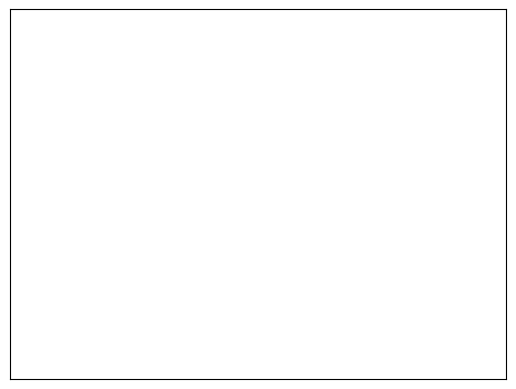

In [20]:
import pandas as pd
import networkx as nx

# Create a multigraph object
G = nx.MultiGraph()

# Read multiple dataframes
dfs = []
dfs.append(route1)
dfs.append(route2)
dfs.append(route3)


# Iterate over each dataframe
for i, df in enumerate(dfs):
    # Extract the node labels from the dataframe
    nodes = list(df.columns.values)

    # Add nodes to the graph
    G.add_nodes_from(nodes)

    # Iterate over each pair of nodes and add edges to the graph
    for j in range(i, len(dfs)):
        if j == i:
            # If in the same dataframe, add edges within that dataframe
            for k in range(len(nodes)):
                for l in range(k+1, len(nodes)):
                    if df.iloc[k,l] > 0 :
                        G.add_edge(nodes[k], nodes[l], weight=df.iloc[k,l])
        else:
            # If in a different dataframe, do not add edges between dataframes
            continue
            
# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos,node_size=100)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.show()


In [21]:
# Calculate the shortest path and distance
start_node = 'ลานจอดรถหน้ามช.' # Replace with your start node
end_node = 'อาคารปฏิบัติการกลางคณะวิทยาศาสตร์'   # Replace with your end node
shortest_path = nx.shortest_path(G, start_node, end_node, weight='weight')
distance = nx.shortest_path_length(G, start_node, end_node, weight='weight')

# Print the shortest path and distance
print(f"The shortest path from {start_node} to {end_node} is: {shortest_path}")
print(f"The distance of the shortest path is: {distance} Seccond({distance/60} minutes)")

The shortest path from ลานจอดรถหน้ามช. to อาคารปฏิบัติการกลางคณะวิทยาศาสตร์ is: ['ลานจอดรถหน้ามช.', 'ลานกิจกรรมหอพักหญิง 2', 'สถานีกลางรถไฟฟ้า (หอหญิง3)', 'อาคารปฏิบัติการกลางคณะวิทยาศาสตร์']
The distance of the shortest path is: 668.39562 Seccond(11.139927 minutes)


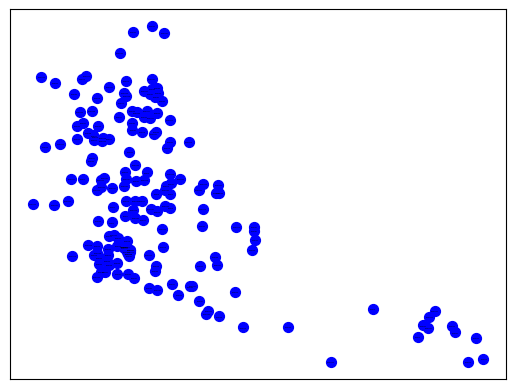

In [22]:
import plotly.express as px 
import networkx as nx 
import matplotlib.pyplot as plt

df_geo =locate
fig = px.scatter(df_geo, x='lng', y='lat', title='Locations')
G = nx.Graph()
for i, row in df_geo.iterrows(): 
    G.add_node(i, pos=(row['lng'], row['lat']), label=f"Node {i}")

    
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos=pos, node_color='blue', node_size=50)
nx.draw_networkx_edges(G, pos=pos,width = 1)
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=0)
fig.add_trace(px.scatter(x=[pos[k][0] for k in pos.keys()], y=[pos[k][1] for k in pos.keys()] 
                          ).data[0])


fig.show()


In [23]:
import pandas as pd
import networkx as nx

# Read the distance matrix files
df1 = route1
df2 = route2

# Create a multi-graph object
G = nx.MultiGraph()

# Add the nodes and edges from each distance matrix file
for i, df in enumerate([df1, df2]):
    nodes = list(df.columns.values)
    G.add_nodes_from(nodes)
    for j in range(len(nodes)):
        for k in range(j+1, len(nodes)):
            if df.iloc[j,k] > 0:
                G.add_edge(nodes[j], nodes[k], weight=df.iloc[j,k], line=i+1)

# Define the source and destination nodes
source_node = 'ลานจอดรถหน้ามช.'
destination_node = 'อาคารปฏิบัติการกลางคณะวิทยาศาสตร์'

# Find the shortest path between the source and destination nodes
shortest_path = nx.shortest_path(G, source_node, destination_node, weight='weight')

# Print the path and line(s) used
print(f"Shortest path: {shortest_path}")
current_line = None
for i in range(len(shortest_path)-1):
    current_edge = G.get_edge_data(shortest_path[i], shortest_path[i+1])
    if current_line != current_edge[0]['line']:
        print(f"Switch to line {current_edge[0]['line']} at {shortest_path[i]}")
        current_line = current_edge[0]['line']
    print(f"Take line {current_line} to {shortest_path[i+1]} (distance: {current_edge[0]['weight']})")


Shortest path: ['ลานจอดรถหน้ามช.', 'ลานกิจกรรมหอพักหญิง 2', 'สถานีกลางรถไฟฟ้า (หอหญิง3)', 'อาคารปฏิบัติการกลางคณะวิทยาศาสตร์']
Switch to line 1 at ลานจอดรถหน้ามช.
Take line 1 to ลานกิจกรรมหอพักหญิง 2 (distance: 214.27272)
Switch to line 2 at ลานกิจกรรมหอพักหญิง 2
Take line 2 to สถานีกลางรถไฟฟ้า (หอหญิง3) (distance: 23.597820000000002)
Take line 2 to อาคารปฏิบัติการกลางคณะวิทยาศาสตร์ (distance: 430.52507999999995)


In [24]:
from collections import defaultdict


# Read the distance matrix files
df1 = route1
df2 = route2

# Create a multi-graph object
G = nx.MultiGraph()

# Add the nodes and edges from each distance matrix file
for i, df in enumerate([df1, df2]):
    nodes = list(df.columns.values)
    G.add_nodes_from(nodes)
    for j in range(len(nodes)):
        for k in range(j+1, len(nodes)):
            if df.iloc[j,k] > 0:
                G.add_edge(nodes[j], nodes[k], weight=df.iloc[j,k], line=i+1)

# Define the source and destination nodes
source_node = 'ลานจอดรถหน้ามช.'
destination_node = 'อาคารปฏิบัติการกลางคณะวิทยาศาสตร์'

# Find the shortest path between the source and destination nodes
shortest_path = nx.shortest_path(G, source_node, destination_node, weight='weight')

# Print the path and line(s) used
print(f"Shortest path: {shortest_path}")

# Create a dictionary of bus lines and their corresponding routes
bus_lines = defaultdict(list)
for node1, node2, data in G.edges(data=True):
    line = data['line']
    bus_lines[line].append(node1)
    if node2 not in shortest_path:
        bus_lines[line].append(node2)
bus_lines[current_line].append(destination_node)

# Print the bus line and route information
current_line = None
for i in range(len(shortest_path)-1):
    current_edge = G.get_edge_data(shortest_path[i], shortest_path[i+1])
    if current_line != current_edge[0]['line']:
        if current_line is not None:
            print(f"Arrive at {shortest_path[i]}")
        print(f"Switch to line {current_edge[0]['line']}")
        current_line = current_edge[0]['line']
    #print(f"


Shortest path: ['ลานจอดรถหน้ามช.', 'ลานกิจกรรมหอพักหญิง 2', 'สถานีกลางรถไฟฟ้า (หอหญิง3)', 'อาคารปฏิบัติการกลางคณะวิทยาศาสตร์']
Switch to line 1
Arrive at ลานกิจกรรมหอพักหญิง 2
Switch to line 2


In [25]:
dfco = walking_times_i.columns.unique()
for col in dfco :
    print(col)

หอพักชาย6
หอพักชาย5
หอ 1 หญิง
7th Male Dormitory
Students' Dormitory Boys
หอ 2 หญิง
หอพักชาย 4
หอ 8 หญิง
หอ 7 หญิง
หอ 5 หญิง
หอ 4 หญิง
หอพักหญิง6
หอพักชาย 3
หอ 3 หญิง
Bangkok Bank
ธนาคารกรุงเทพ
ธนาคารกรุงไทย
คณะมนุษยศาสตร์
ธนาคารไทยพาณิชย์
Faculty of Political Science and Public Administration
คณะสังคมศาสตร์
คณะวิทยาศาสตร์
คณะเศรษฐศาสตร์
คณะนิติศาสตร์
คณะเกษตรศาสตร์
คณะการสื่อสารมวลชน
วิทยาลัยศิลปะ สื่อ และเทคโนโลยี
โครงการหลวง
อาคาร 3
สถาบันวิจัยวิทยาศาสตร์และเทคโนโลยี
คณะศึกษาศาสตร์
โรงพยาบาลสัตว์เล็ก
หอพักนักศึกษา คณะพยาบาลศาสตร์
อาคารสันทนาการ
งานพัสดุ
ภาควิชาวิศวกรรมโยธา
โรงประลองวิศวกรรม
อาคารเรียนรวม 4 ชั้้น
อาคารเรียนรวม 3 ชั้น
ภาควิชาวิศวกรรมอุตสาหการ
ตึกเทอร์โมไดนามิก
ภาควิชาวิศวกรรมเหมืองแร่
ภาควิชาวิศวกรรมไฟฟ้า
โรงอาหารคณะวิศวกรรมศาสตร์
Engineering Home
ภาควิชาวิศวกรรมสิ่งแวดล้อม
ห้องสมุดคณะวิศวกรรมศาสตร์
อาคารเครื่องกล 4
อาคารวิศวกรรมเครื่องกล 4
บ้านพักข้าราชการ
มหาวิทยาลัยเชียงใหม่
สนามฮอกกี้
อาคารวิศวะรวมใจ
Pb1
ธนาคารออมสิน
ธนาคารกสิกรไทย
ตู้ยามประตูวิศวกรรมศาสตร์
ตู้ยาม

In [26]:
from collections import defaultdict

# Read the distance matrix files
dfwalk =  route0
df1 = route1
df2 = route2
df3 = route3
df4 = route4
df5 = route5
df6 = route6
df7 = route7
df8 = route8
df9 = route9

# Create a multi-graph object
G = nx.MultiGraph()

# Add the nodes and edges from each distance matrix file
for i, df in enumerate([df1, df2,df3,df4,df5,df6,df7,df8,df9,dfwalk]):
    nodes = list(df.columns.values)
    G.add_nodes_from(nodes)
    for j in range(len(nodes)):
        for k in range(j+1, len(nodes)):
            if df.iloc[j,k] > 0:
                G.add_edge(nodes[j], nodes[k], weight=df.iloc[j,k], line=i+1)
# Define the source and destination nodes
source_node = 'หอพักชาย 4'
destination_node = 'โรงพยาบาลสัตว์เล็ก'

# Find the shortest path between the source and destination nodes
shortest_path = nx.shortest_path(G, source_node, destination_node, weight='weight')

# Print the path and line(s) used
print(f"Shortest path: {shortest_path}")

# Create a dictionary of bus lines and their corresponding routes
bus_lines = defaultdict(list)
for node1, node2, data in G.edges(data=True):
    line = data['line']
    bus_lines[line].append(node1)
    if node2 not in shortest_path:
        bus_lines[line].append(node2)
bus_lines[current_line].append(destination_node)

# Print the bus line and route information
current_line = None
total_distance = 0
for i in range(len(shortest_path)-1):
    current_edge = G.get_edge_data(shortest_path[i], shortest_path[i+1])
    if current_line != current_edge[0]['line']:
        if current_line is not None:
            print(f"Arrive at {shortest_path[i]} (distance from previous stop: {current_distance})")
        print(f"Switch to line {current_edge[0]['line']}")
        current_line = current_edge[0]['line']
    current_distance = current_edge[0]['weight']
    total_distance += current_distance
    print(f"Take line {current_line} to {shortest_path[i+1]} (distance: {current_distance}, total distance: {total_distance})")
print(f"Total distance: {total_distance}")


Shortest path: ['หอพักชาย 4', 'ระหว่างหอพักนักศึกษาชาย อาคาร 4 และ 3', 'โรงจอดรถไฟฟ้า', 'โรงพยาบาลสัตว์เล็ก']
Switch to line 10
Take line 10 to ระหว่างหอพักนักศึกษาชาย อาคาร 4 และ 3 (distance: 48.38807810111769, total distance: 48.38807810111769)
Arrive at ระหว่างหอพักนักศึกษาชาย อาคาร 4 และ 3 (distance from previous stop: 48.38807810111769)
Switch to line 4
Take line 4 to โรงจอดรถไฟฟ้า (distance: 146.87351999999998, total distance: 195.26159810111767)
Arrive at โรงจอดรถไฟฟ้า (distance from previous stop: 146.87351999999998)
Switch to line 10
Take line 10 to โรงพยาบาลสัตว์เล็ก (distance: 107.17049390158232, total distance: 302.43209200269996)
Total distance: 302.43209200269996


In [ ]:
route5